In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_json('books_filter.json')
categories = pd.read_json('categories.json')

In [3]:
data.rename(columns={'category': 'subcategory'}, inplace=True)
categories.drop_duplicates(inplace=True)
combined_data = pd.merge(data, categories, on='subcategory', how='left')
combined_data.drop_duplicates(subset=['title'], inplace=True)
combined_data.reset_index(inplace=True)

In [4]:
combined_data['format_area'] = combined_data['format'].apply(lambda expression: str(eval(expression)))
combined_data['format_area'] = combined_data['format_area'].astype(float)

In [5]:
format_mapping = {'Broš': 0, 'Tvrd': 1}

combined_data['binding_type'] = combined_data['binding'].map(format_mapping)
combined_data.drop(['binding'], axis=1, inplace=True)

In [6]:
unique_categories = combined_data['main_category'].unique()

category_mapping = {category: i for i, category in enumerate(unique_categories)}

combined_data['category'] = combined_data['main_category'].map(category_mapping)

mapping_df = pd.DataFrame(list(category_mapping.items()), columns=['main_category', 'category'])
mapping_df.to_json('category_mapping.json', index=False, orient='records', force_ascii=False)

In [7]:
# category_counts = combined_data['main_category'].value_counts()
# sorted_categories = category_counts.index, 

# category_mapping = {category: i for i, category in enumerate(sorted_categories)}

# combined_data['category'] = combined_data['main_category'].map(category_mapping)
# combined_data['category']

In [8]:
# unique_categories

In [9]:
unique_categories = combined_data['subcategory'].unique()

category_mapping = {category: i for i, category in enumerate(unique_categories)}

combined_data['category2'] = combined_data['subcategory'].map(category_mapping)

mapping_df = pd.DataFrame(list(category_mapping.items()), columns=['subcategory', 'category2'])
mapping_df.to_json('category2_mapping.json', index=False, orient='records', force_ascii=False)

In [10]:
# title_counts = combined_data['subcategory'].value_counts()
# combined_data['subcategory_frequency'] = combined_data['subcategory'].map(title_counts)

In [11]:
# unique_publisher = combined_data['publisher'].unique()

# publisher_mapping = {publisher: i for i, publisher in enumerate(unique_publisher)}

# combined_data['publisher2'] = combined_data['publisher'].map(publisher_mapping)

# mapping_df = pd.DataFrame(list(publisher_mapping.items()), columns=['publisher', 'publisher2'])
# mapping_df.to_json('publisher_mapping.json', index=False, orient='records', force_ascii=False)

In [12]:
# title_counts = combined_data['publisher'].value_counts()
# combined_data['publisher_frequency'] = combined_data['publisher'].map(title_counts)

In [13]:
# combined_data['publisher_book_count'] = combined_data.groupby('publisher')['title'].transform('count')

# combined_data['more_than_100_books'] = (combined_data['publisher_book_count'] > 100).astype(int)
# combined_data

In [14]:
# combined_data['decade'] = (combined_data['year'] // 10) * 10

# books_per_decade = combined_data['decade'].value_counts().sort_index()
# combined_data

In [15]:
# data_exploded = combined_data.explode('author')
# author_book_counts = data_exploded.groupby('author').size().reset_index(name='num_books_by_author')
# author_book_counts.loc[author_book_counts['author'] == 'Grupa autora', 'num_books_by_author'] = int(author_book_counts['num_books_by_author'].mean())
# author_book_counts.loc[author_book_counts['author'] == 'grupa autora', 'num_books_by_author'] = int(author_book_counts['num_books_by_author'].mean())
# author_book_counts.sort_values(['num_books_by_author'])
# combined_data = combined_data.merge(author_book_counts, on='author', how='left')
# frequency = combined_data['author'].value_counts()

# combined_data['author_int'] = combined_data['author'].map(frequency)
# combined_data
# unique_author = combined_data['author'].unique()

# author_mapping = {author: i for i, author in enumerate(unique_author)}

# combined_data['author2'] = combined_data['author'].map(author_mapping)

# mapping_df = pd.DataFrame(list(author_mapping.items()), columns=['author', 'author2'])
# mapping_df.to_json('author_mapping.json', index=False, orient='records', force_ascii=False)

In [16]:
combined_data['area'] = combined_data['format_area'] * combined_data['pages']
combined_data

,index,title,author,subcategory,publisher,year,pages,format,description,price,weight,main_category,format_area,binding_type,category,category2,area
0,0,SAVREMENE PROMENE U NARODNOM GOVORU,Toni Hogland,POEZIJA,KONTRAST,2023,106,14.8*21,"Hoglandova neposrednost, živahnost njegovog ko...",629,0.5,JEZIK I KNJIŽEVNOST,310.80,0,0,0,32944.80
1,1,BLISTAVI TRAG JEDNOG PUŽA,Đema Lijenas,TINEJDŽ I YA ROMAN,ODISEJA,2024,290,14*20,Semov dan se sastoji iz preciznog niza rutina ...,742,0.5,TINEJDŽ I YA,280.00,0,1,1,81200.00
2,2,HOĆU U ŠKOLU,Jasminka Petrović,ROMANI I PRIČE ZA DECU OD 7 DO 9 GODINA,ODISEJA,2024,106,14*20,Nikoli je stvarno dosta škole. Dosadno mu je n...,673,0.5,DEČJE KNJIGE,280.00,0,2,2,29680.00
3,3,DORĆOLSKE SKASKE,Miomir Miša Ristić,DOMAĆE PRIČE I PRIPOVETKE,ODISEJA,2024,248,14*20,"Miša Ristić, sa nadimkom Menjuhin, akademski m...",891,0.5,ROMANI,280.00,0,3,3,69440.00
4,4,OSHO ZEN TAROT + KARTE + LUKSUZNA KUTIJA,Osho,EZOTERIJA,MIRDIN,2020,188,13*19,Komplet je u luksuznoj kutiji i sadrži knjigu...,2673,0.5,POPULARNA PSIHOLOGIJA I LIČNI RAZVOJ,247.00,0,4,4,46436.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15739,16344,LOVAC NA ZMAJEVE,Haled Hoseini,ROMAN,LAGUNA,2010,343,13*20,Ovaj snažan debitantski roman… pripoveda o žes...,899,0.5,ROMANI,260.00,0,3,25,89180.00
15740,16345,ČOVEK VUK,Sigmund Frojd,PSIHOLOGIJA,ČIGOJA ŠTAMPA,2003,152,13*20,Još jedan od Frojdovih čuvenih slučajeva iz is...,770,0.5,STRUČNA LITERATURA,260.00,0,5,57,39520.00
15741,16346,NEUROTIČNA LIČNOST NAŠEG DOBA,K.HERNAJ,PSIHIJATRIJA,ČIGOJA ŠTAMPA,2004,231,14.5*20.5,Delo Neurotična ličnost našeg doba može i dana...,1100,0.5,STRUČNA LITERATURA,297.25,0,5,133,68664.75
15742,16347,GLOBALNA EKONOMIJA,ERIK S.REINERT,EKONOMSKA SITUACIJA I TEORIJA,ČIGOJA ŠTAMPA,2006,156,14*23,Kako su bogati postali bogati i zašto siromašn...,770,0.5,STRUČNA LITERATURA,322.00,0,5,164,50232.00


In [17]:
# combined_data['bestseller'] = combined_data['description'].str.contains('luksuz', case=False).astype(int) | combined_data['description'].str.contains('bestsel', case=False).astype(int) | combined_data['description'].str.contains('umetn', case=False).astype(int) | combined_data['description'].str.contains('antologij', case=False).astype(int) | combined_data['title'].str.contains('velik', case=False).astype(int)
# combined_data['bestseller'].value_counts()

In [18]:
# combined_data['description_length'] = combined_data['description'].apply(len)

In [19]:
new_data = combined_data.drop(['index', 'weight', 'title', 'author', 'subcategory', 'publisher', 'format', 'description', 'main_category', 'year', 'format_area', 'pages'], axis=1)
# combined_data.drop(['index'], axis=1, inplace=True)
new_data.rename(columns={'category': 'main_category', 'category2':'subcategory', 'author2':'author', 'publisher2':'publisher'}, inplace=True)

In [20]:
# combined_data.drop(['index', 'weight', 'title', 'author', 'subcategory', 'publisher', 'format', 'description', 'main_category', 'year'], axis=1, inplace=True)

<Axes: >

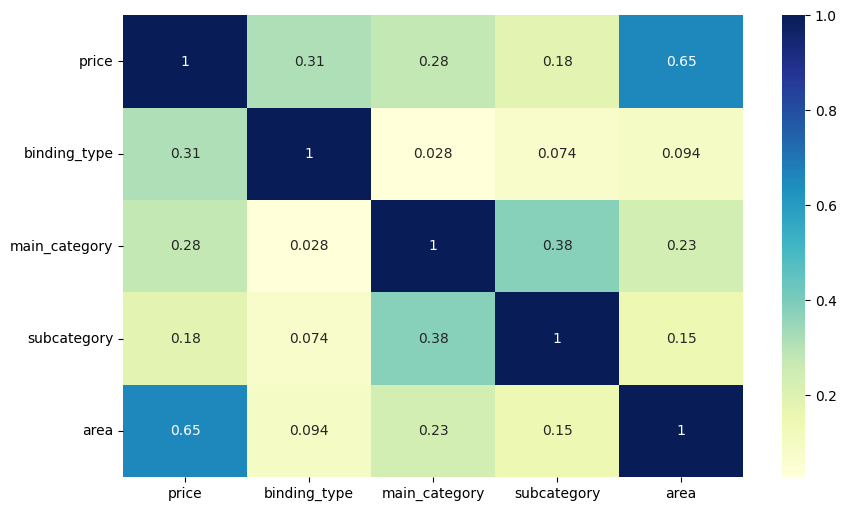

In [21]:
plt.figure(figsize=(10, 6))
plt.tight_layout()
sn.heatmap(new_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [22]:
new_data.to_json('books_pre.json', orient='records', force_ascii=False)

In [23]:
kmeans_data = combined_data.drop(['index', 'weight', 'title', 'author', 'subcategory', 'publisher', 'format', 'description', 'main_category', 'year'], axis=1)
kmeans_data

,pages,price,format_area,binding_type,category,category2,area
0,106,629,310.80,0,0,0,32944.80
1,290,742,280.00,0,1,1,81200.00
2,106,673,280.00,0,2,2,29680.00
3,248,891,280.00,0,3,3,69440.00
4,188,2673,247.00,0,4,4,46436.00
...,...,...,...,...,...,...,...
15739,343,899,260.00,0,3,25,89180.00
15740,152,770,260.00,0,5,57,39520.00
15741,231,1100,297.25,0,5,133,68664.75
15742,156,770,322.00,0,5,164,50232.00
